# Mounting onto the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.metrics import (
    fbeta_score, make_scorer,
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)

# Importing

In [ ]:
# import the data
df_clients = pd.read_excel('/content/drive/MyDrive/Hackaton/Code/clients.xlsx')
df_complaints = pd.read_excel('/content/drive/MyDrive/Hackaton/Code/complaints.xlsx')

In [ ]:
print(df_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_complaints['complaints_count'] = df_complaints.groupby('customerID')['complaint_number'].transform('max')
df_complaints['all_complaints'] = df_complaints.groupby('customerID')['complaint'].transform(list)

In [ ]:
df_complaints.head(10)

,customerID,complaint,complaint_number,complaints_count,all_complaints
0,9565-DJPIB,The streaming TV service frequently buffers or...,1,1,The streaming TV service frequently buffers or...
1,4342-HFXWS,The DSL internet service has been inconsistent...,1,5,The DSL internet service has been inconsistent...
2,4342-HFXWS,The streaming TV service often buffers excessi...,2,5,The streaming TV service often buffers excessi...
3,4342-HFXWS,"Despite having tech support included, it takes...",3,5,"Despite having tech support included, it takes..."
4,4342-HFXWS,The device protection plan I pay for did not c...,4,5,The device protection plan I pay for did not c...
5,4342-HFXWS,"I requested a paper bill for my records, but t...",5,5,"I requested a paper bill for my records, but t..."
6,8988-ECPJR,The internet service has been very inconsisten...,1,3,The internet service has been very inconsisten...
7,8988-ECPJR,I was disappointed to find out that there is n...,2,3,I was disappointed to find out that there is n...
8,8988-ECPJR,The monthly charges are too high for the limit...,3,3,The monthly charges are too high for the limit...
9,1567-DSCIC,The internet speed with your fiber optic servi...,1,2,The internet speed with your fiber optic servi...


In [ ]:
temp_complaints = df_complaints.groupby('customerID').agg({
    'complaints_count': 'max',
    'all_complaints': list
    }).reset_index()
print(temp_complaints.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        704 non-null    object
 1   complaints_count  704 non-null    int64 
 2   all_complaints    704 non-null    object
dtypes: int64(1), object(2)
memory usage: 16.6+ KB
None


In [ ]:
df_merge=df_clients.merge(temp_complaints,on='customerID', how='left')
print(df_merge.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df_merge['complained']=np.where(~df_merge['complaints_count'].isnull(),1,0)
df_merge['complaints_count']=np.where(df_merge['complaints_count'].isnull(),0, df_merge['complaints_count'])
print(df_merge.head())

df_merge.groupby(['complained','Churn'])['Churn'].count()

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingMovies  \
0  No phone service             DSL             No  ...              No   
1                No             DSL            Yes  ...              No   
2                No             DSL            Yes  ...              No   
3  No phone service             DSL            Yes  ...              No   
4                No     Fiber optic             No  ...              No   

         Contract PaperlessBilling              PaymentMethod Monthl

complained  Churn
0           No       4895
            Yes      1444
1           No        279
            Yes       425
Name: Churn, dtype: int64

In [ ]:
# Convert 'TotalCharges' to numeric (handle errors if there are empty spaces)
df_merge['TotalCharges'] = pd.to_numeric(df_merge['TotalCharges'], errors='coerce')

merge_numeric = df_merge.drop(columns=['customerID', 'all_complaints'], errors='ignore')
merge_numeric.info()
print(merge_numeric.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Generating Dummies

In [ ]:
merge_numeric = pd.get_dummies(merge_numeric, drop_first=True)

In [ ]:
merge_numeric.head()
merge_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   complaints_count                       7043 non-null   float64
 5   complained                             7043 non-null   int64  
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

# Histograms

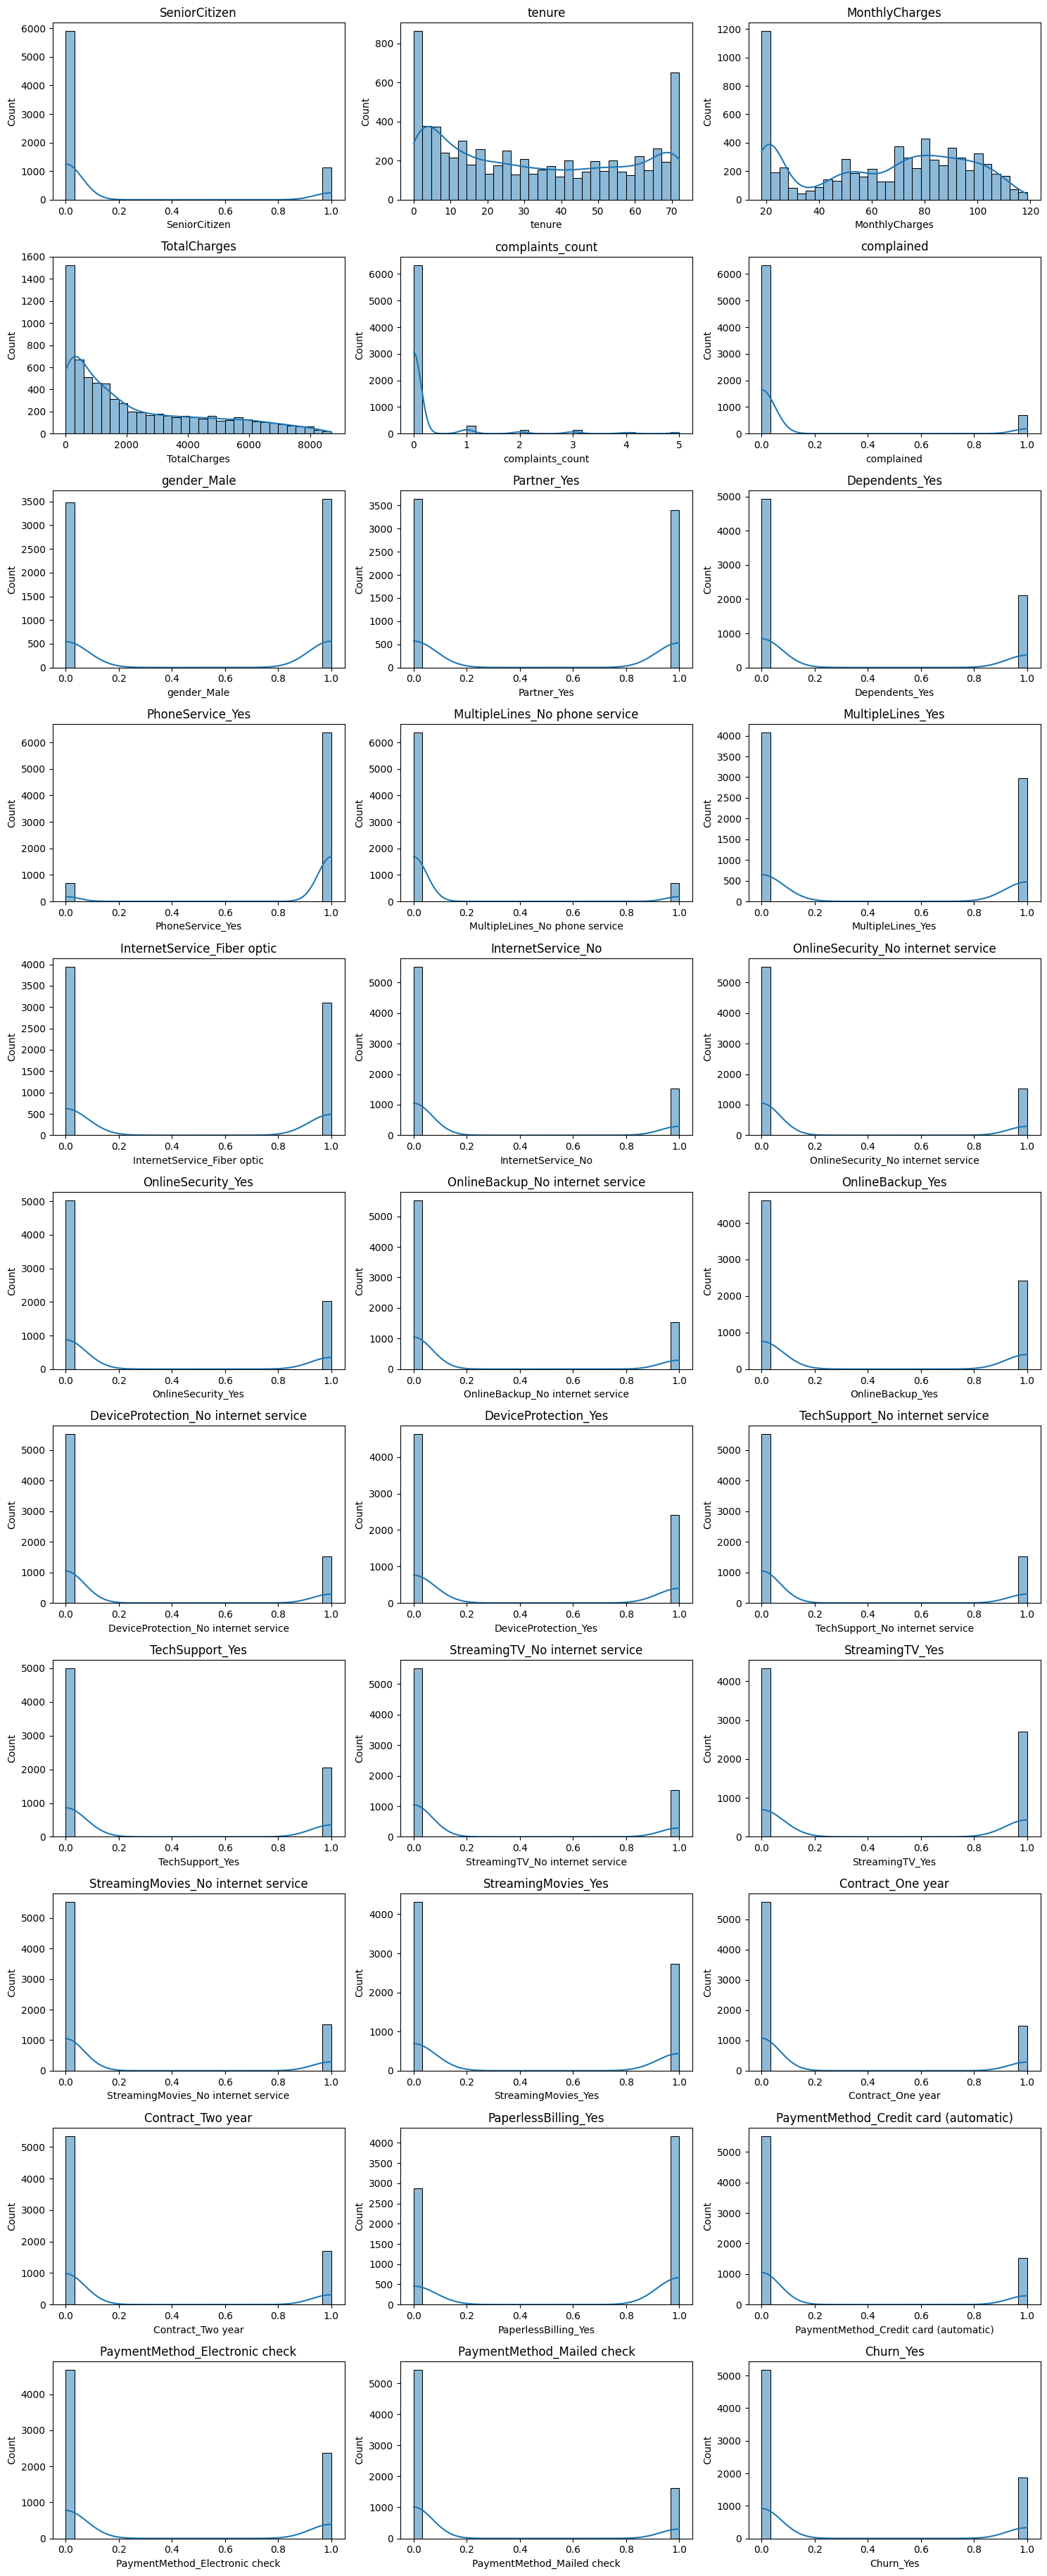

In [ ]:
# Select only numerical columns (exclude boolean/dummy variables)
numeric_cols = merge_numeric.select_dtypes(include=['int64', 'float64','bool'])

# Set up subplots (adjust rows/cols based on number of features)
num_features = len(numeric_cols.columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, num_features * 1.2))
axes = axes.flatten()  # Flatten to easily iterate

# Plot histograms
for i, col in enumerate(numeric_cols.columns):
    sns.histplot(merge_numeric[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(col)

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Pre-processing

In [ ]:
merge_numeric.drop(columns=['complaints_count','complained'],inplace=True)

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
X_imp = merge_numeric.drop(columns=['Churn_Yes'])
y = merge_numeric['Churn_Yes']

Imputation of missing values with KNN imputer (based non closest neightbours)

In [ ]:
# === Impute missing values with KNNImputer ===
imputer = KNNImputer(n_neighbors=5)
X_imp[['TotalCharges']] = imputer.fit_transform(X_imp[['TotalCharges']])

Transormation of numerical variable

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

In [ ]:
X = X_imp.copy()

In [ ]:
scaler = PowerTransformer(method='yeo-johnson')

X[['tenure']] = scaler.fit_transform(X[['tenure']])

X['MonthlyCharges'] = np.cbrt(X['MonthlyCharges'])

X['TotalCharges'] = np.log1p(X['TotalCharges'])

# Logistic Classifier

## Logistic with F2 score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

f2_scorer = make_scorer(fbeta_score, beta=2)

selector = RFECV(
    estimator=LogisticRegression(
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000
    ),
    step=1,
    cv=5,
    scoring=f2_scorer,
    min_features_to_select=5
)

pipeline = Pipeline([
    ('select', selector),
    ('clf', LogisticRegression(
        solver='liblinear',
        class_weight='balanced',
        max_iter=1000
    ))
])

param_grid = {
    'clf__C':       [0.01, 0.1, 1, 10, 15, 20],
    'clf__penalty': ['l1', 'l2']
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring=f2_scorer,
    cv=10,
    n_jobs=-1,
    refit=True
)
grid.fit(X_train, y_train)

best = grid.best_estimator_
y_pred = best.predict(X_test)

print("Best params:", grid.best_params_)
print(f"Selected features: {best.named_steps['select'].n_features_}")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"F2 Score:  {fbeta_score(y_test, y_pred, beta=2):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best params: {'clf__C': 15, 'clf__penalty': 'l2'}
Selected features: 8
Accuracy:  0.7459
Precision: 0.5134
Recall:    0.8209
F1 Score:  0.6317
F2 Score:  0.7330
Confusion Matrix:
 [[744 291]
 [ 67 307]]


Best params: {'clf__C': 10, 'clf__penalty': 'l2'}
Selected features: 8
Accuracy:  0.7459
Precision: 0.5134
Recall:    0.8209
F1 Score:  0.6317
F2 Score:  0.7330
Confusion Matrix:
 [[744 291]
 [ 67 307]]

### In depth analysis of logistic

In [ ]:
from sklearn.metrics import (
    classification_report,
    roc_auc_score, roc_curve,
    precision_recall_curve
)

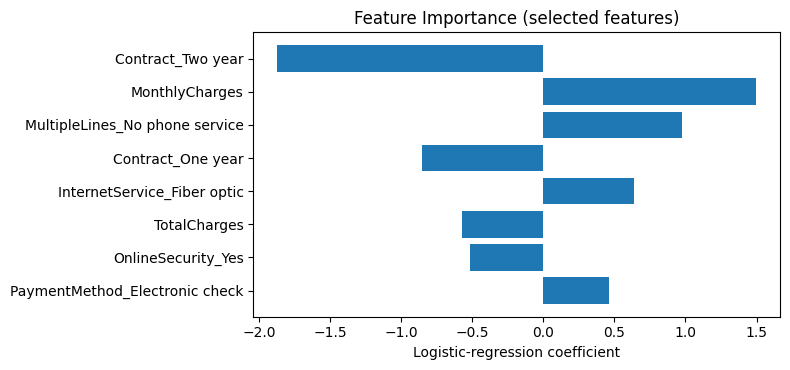

In [ ]:
# 1) Feature Importance
mask   = best.named_steps['select'].support_
coef   = best.named_steps['clf'].coef_.ravel()

if hasattr(X_test, "columns"):
    feat_names = np.array(X_test.columns)[mask]
else:
    feat_names = np.arange(len(coef))

order = np.argsort(np.abs(coef))[::-1]

import matplotlib.pyplot as plt
fig_imp, ax_imp = plt.subplots(figsize=(8, 0.35 * len(order) + 1))
ax_imp.barh(feat_names[order], coef[order])
ax_imp.set_xlabel("Logistic-regression coefficient")
ax_imp.set_title("Feature Importance (selected features)")
ax_imp.invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
# 2) Classification report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

mask       = best.named_steps['select'].get_support()
feat_names = X_train.columns[mask]
coefs      = best.named_steps['clf'].coef_[0]

imp_df = pd.DataFrame({
    'Feature'     : feat_names,
    'Coefficient' : coefs,
    'Odds Ratio'  : np.exp(coefs)
})

imp_df['AbsCoef'] = imp_df['Coefficient'].abs()
imp_df = imp_df.sort_values('AbsCoef', ascending=False).drop(columns='AbsCoef')

print("\n=== All Selected Features ===")
print(imp_df.to_string(index=False))


=== Classification Report ===
              precision    recall  f1-score   support

       False     0.9174    0.7188    0.8061      1035
        True     0.5134    0.8209    0.6317       374

    accuracy                         0.7459      1409
   macro avg     0.7154    0.7698    0.7189      1409
weighted avg     0.8101    0.7459    0.7598      1409


=== All Selected Features ===
                       Feature  Coefficient  Odds Ratio
             Contract_Two year    -1.873603    0.153569
                MonthlyCharges     1.496537    4.466194
MultipleLines_No phone service     0.974856    2.650786
             Contract_One year    -0.856335    0.424716
   InternetService_Fiber optic     0.634326    1.885751
                  TotalCharges    -0.573425    0.563592
            OnlineSecurity_Yes    -0.519048    0.595087
PaymentMethod_Electronic check     0.458590    1.581842



ROC AUC: 0.8461


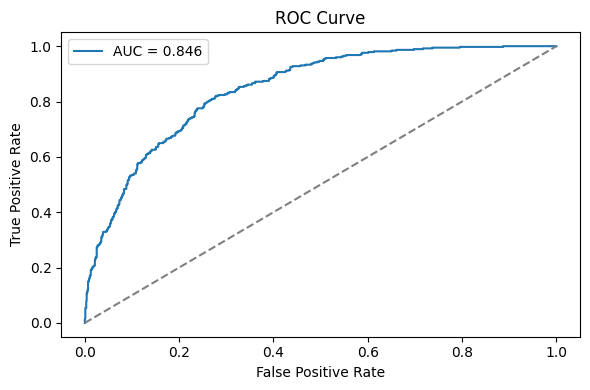

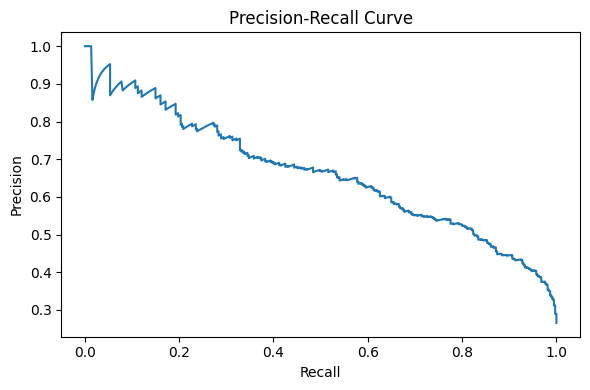

In [ ]:
# 3) ROC AUC
y_proba = best.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)
print(f"\nROC AUC: {auc:.4f}")

# 4) Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# 5) Plot Precision‑Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision‑Recall Curve")
plt.tight_layout()
plt.show()


=== Decile Analysis (Top decile = highest predicted risk) ===
        ChurnRate  Count
Decile                  
9        0.765957    141
8        0.567376    141
7        0.411348    141
6        0.361702    141
5        0.207143    140
4        0.163121    141
3        0.113475    141
2        0.042553    141
1        0.014184    141
0        0.007092    141


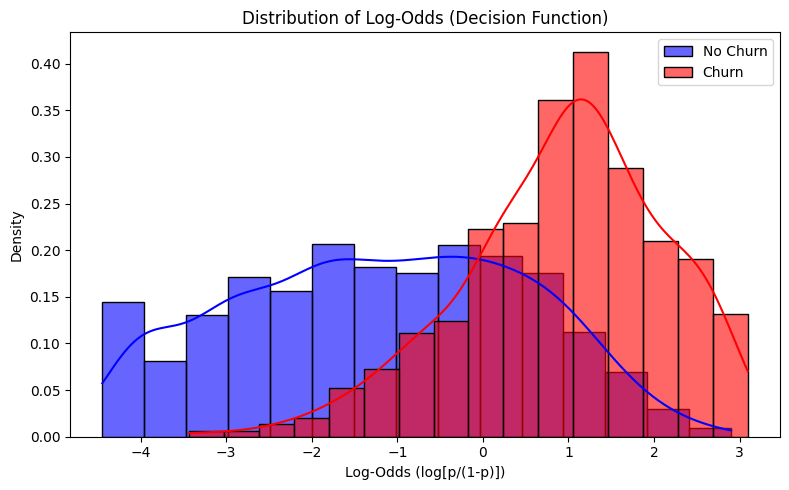

In [ ]:
# 6) Decile lift table
df_lift = pd.DataFrame({
    'Actual':        y_test,
    'PredictedProb': y_proba
})
df_lift['Decile'] = pd.qcut(df_lift['PredictedProb'], 10, labels=False, duplicates='drop')
lift = df_lift.groupby('Decile').agg(
    ChurnRate=('Actual','mean'),
    Count    =('Actual','count')
).sort_index(ascending=False)

print("\n=== Decile Analysis (Top decile = highest predicted risk) ===")
print(lift)


log_odds = best.decision_function(X_test)

plt.figure(figsize=(8,5))
sns.histplot(log_odds[y_test==0], kde=True, stat="density",
             label='No Churn',  color='blue', alpha=0.6)
sns.histplot(log_odds[y_test==1], kde=True, stat="density",
             label='Churn',     color='red',  alpha=0.6)
plt.title('Distribution of Log‑Odds (Decision Function)')
plt.xlabel('Log-Odds (log[p/(1-p)])')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Demographic Analysis

In [ ]:
if "X_imp" not in globals():
    from sklearn.preprocessing import OneHotEncoder
    from sklearn.compose import ColumnTransformer

    num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
    cat_cols = [c for c in df_clients.columns
                if c not in num_cols + ["customerID", "Churn"]]

    enc = ColumnTransformer([
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ]).fit(df_clients)

    X_imp = pd.DataFrame(enc.transform(df_clients),
                         columns=enc.get_feature_names_out(),
                         index=df_clients.index)

df_demo = df_clients.copy()
df_demo["Churn_Flag"] = (df_demo["Churn"] == "Yes").astype(int)
df_demo["p_churn"]    = best.predict_proba(X_imp)[:, 1]
df_demo["pred_flag"]  = (df_demo["p_churn"] >= 0.31).astype(int)



gender
        customers  actual_rate  pred_rate  contact  lift
seg                                                     
Male         3555        0.262      0.122    0.123 1.014
Female       3488        0.269      0.119    0.119 0.986

SeniorCitizen
            customers  actual_rate  pred_rate  contact  lift
seg                                                         
Non-Senior       5901        0.236      0.122    0.122 1.010
Senior           1142        0.417      0.114    0.116 0.947

Partner
     customers  actual_rate  pred_rate  contact  lift
seg                                                  
No        3641        0.330      0.193    0.193 1.597
Yes       3402        0.197      0.043    0.044 0.361

Dependents
     customers  actual_rate  pred_rate  contact  lift
seg                                                  
No        4933        0.313      0.145    0.146 1.205
Yes       2110        0.155      0.063    0.063 0.521


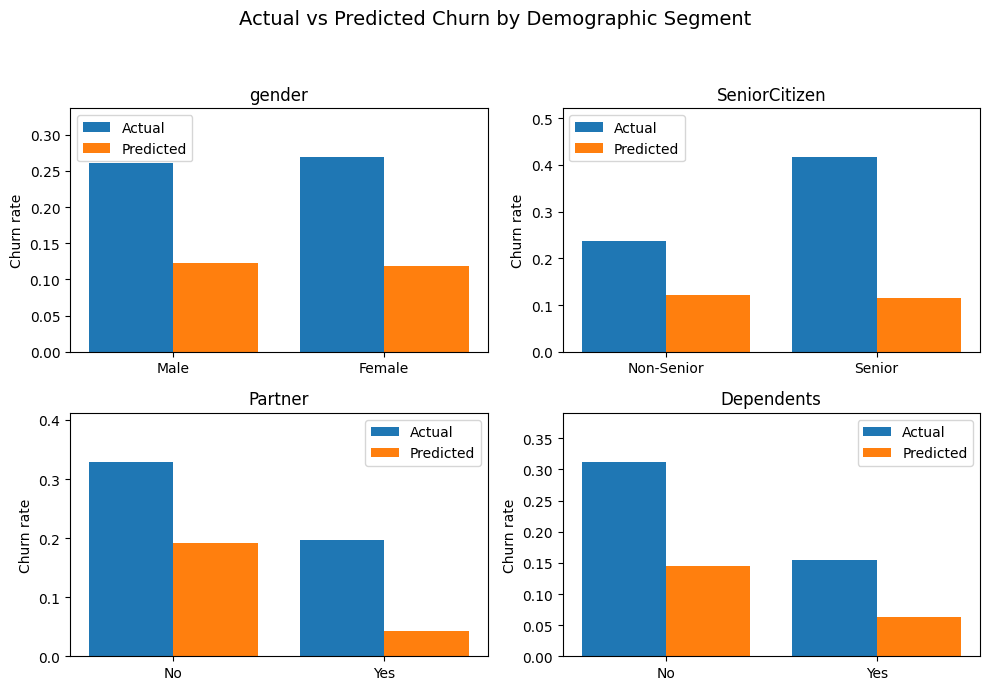

In [ ]:
demo_map = {
    "gender"        : df_demo["gender"],
    "SeniorCitizen" : df_demo["SeniorCitizen"].map({1:"Senior", 0:"Non-Senior"}),
    "Partner"       : df_demo["Partner"],
    "Dependents"    : df_demo["Dependents"]
}

base_p = df_demo["p_churn"].mean()

def make_table(label, series):
    tbl = (df_demo.assign(seg=series)
             .groupby("seg")
             .agg(customers   =("customerID","count"),
                  actual_rate =("Churn_Flag","mean"),
                  pred_rate   =("p_churn","mean"),
                  contact     =("pred_flag","mean"))
             .assign(lift = lambda t: t.pred_rate / base_p)
             .sort_values("pred_rate", ascending=False))
    print(f"\n{label}\n{tbl.to_string(float_format=lambda x:f'{x:0.3f}')}")
    return tbl

tables = {k: make_table(k,v) for k,v in demo_map.items()}

fig, axes = plt.subplots(2,2, figsize=(10,7))
axes = axes.ravel()

for ax, (title, tbl) in zip(axes, tables.items()):
    x = np.arange(len(tbl))
    ax.bar(x-0.2, tbl["actual_rate"],  width=0.4, label="Actual")
    ax.bar(x+0.2, tbl["pred_rate"],    width=0.4, label="Predicted")
    ax.set_xticks(x); ax.set_xticklabels(tbl.index.astype(str))
    ax.set_title(title); ax.set_ylabel("Churn rate")
    ax.set_ylim(0, max(tbl.actual_rate.max(), tbl.pred_rate.max())*1.25)
    ax.legend()

plt.suptitle("Actual vs Predicted Churn by Demographic Segment", fontsize=14)
plt.tight_layout(rect=[0,0,1,0.94])
plt.show()


# Cost Analysis

In [ ]:
merge_numeric.groupby('Churn_Yes')[['tenure','TotalCharges','MonthlyCharges']].mean()

,tenure,TotalCharges,MonthlyCharges
Churn_Yes,,,
False,37.569965,2555.344141,61.265124
True,17.979133,1531.796094,74.441332


In [ ]:
merge_numeric.groupby('Churn_Yes')[['tenure','TotalCharges','MonthlyCharges']].std()

,tenure,TotalCharges,MonthlyCharges
Churn_Yes,,,
False,24.113777,2329.456984,31.092648
True,19.531123,1890.822994,24.666053


In [ ]:
merge_numeric.groupby('Churn_Yes')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn_Yes,,,,,,,,
False,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
True,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


Churners pay $13 more per month → losing them hurts more. \\
Churners exit ~20 mo earlier → remaining lifetime may be longer than for happy customers already at 38 mo.